# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

# Load Dataset

Data yang digunakan merupakan data dummy karyawan sebuah perusahaan dengan beberapa fitur atau metrik yang akan dipelajari oleh model untuk memprediksi dan menentukan karyawan mana saja yang layak mendapatkan promosi jabatan

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/StartupCampus/employee/train.csv')
test = pd.read_csv('/content/drive/MyDrive/StartupCampus/employee/test.csv')

# data sumbission merupakan data yang sama dengan data test namun hanya berisikan kolom identitas (employee_id) dan label target yang sebenarnya (is_promoted)
submission = pd.read_csv('/content/drive/MyDrive/StartupCampus/employee/submission.csv')

In [ ]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,48048,Sales & Marketing,region_14,NaN,m,other,1,23,1.0,2,0,53,0
1,39657,Finance,region_29,Bachelor's,m,other,2,26,NaN,1,0,58,0
2,16937,Operations,region_22,Bachelor's,f,sourcing,2,29,NaN,1,0,62,0
3,69661,Analytics,region_4,Master's & above,m,other,1,32,4.0,5,0,84,0
4,11746,Sales & Marketing,region_26,Bachelor's,f,other,1,31,3.0,5,0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40095,29502,Technology,region_2,Below Secondary,m,other,2,24,NaN,1,0,80,1
40096,60012,Operations,region_22,Master's & above,f,sourcing,1,34,5.0,5,0,59,0
40097,70853,Operations,region_15,Bachelor's,m,other,1,27,NaN,1,0,60,0
40098,20163,Technology,region_2,Bachelor's,f,other,1,34,3.0,4,0,79,0


In [ ]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,3387,Procurement,region_15,Bachelor's,f,other,1,36,3.0,3,0,69
1,67479,Sales & Marketing,region_7,Bachelor's,m,sourcing,2,31,5.0,4,0,51
2,8070,Operations,region_13,Bachelor's,f,sourcing,1,40,3.0,13,0,63
3,46497,Analytics,region_26,Bachelor's,m,other,1,31,1.0,4,0,85
4,54990,Operations,region_28,Bachelor's,m,sourcing,1,24,NaN,1,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...
14702,51178,Technology,region_16,Bachelor's,m,sourcing,1,30,4.0,8,0,77
14703,16756,Procurement,region_13,Master's & above,f,other,1,37,5.0,8,0,68
14704,745,Technology,region_22,Bachelor's,m,referred,1,31,4.0,4,0,78
14705,17637,R&D,region_10,Master's & above,m,other,1,34,5.0,6,0,87


In [ ]:
submission

,employee_id,is_promoted
0,3387,1
1,67479,0
2,8070,0
3,46497,0
4,54990,0
...,...,...
14702,51178,0
14703,16756,0
14704,745,0
14705,17637,0


# Data Cleansing

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40100 entries, 0 to 40099
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           40100 non-null  int64  
 1   department            40100 non-null  object 
 2   region                40100 non-null  object 
 3   education             38332 non-null  object 
 4   gender                40100 non-null  object 
 5   recruitment_channel   40100 non-null  object 
 6   no_of_trainings       40100 non-null  int64  
 7   age                   40100 non-null  int64  
 8   previous_year_rating  37076 non-null  float64
 9   length_of_service     40100 non-null  int64  
 10  awards_won?           40100 non-null  int64  
 11  avg_training_score    40100 non-null  int64  
 12  is_promoted           40100 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 4.0+ MB


In [ ]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               1768
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3024
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
train['education'].value_counts()

Bachelor's          26826
Master's & above    10901
Below Secondary       605
Name: education, dtype: int64

In [ ]:
train['previous_year_rating'].value_counts()

3.0    13621
5.0     8590
4.0     7202
1.0     4598
2.0     3065
Name: previous_year_rating, dtype: int64

## Handling Null Values

In [ ]:
# Mengisi nilai kosong pada kolom pendidikan dengan nilai "tidak diketahui"
train['education'].fillna('unknown', inplace = True)

# Mengisi nilai kosong pada kolom previous year rating dengan nilai 0
train['previous_year_rating'].fillna(0, inplace = True)

In [ ]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Data Preprocessing

<ipython-input-165-bb7d1916a082>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True,cmap='Blues')


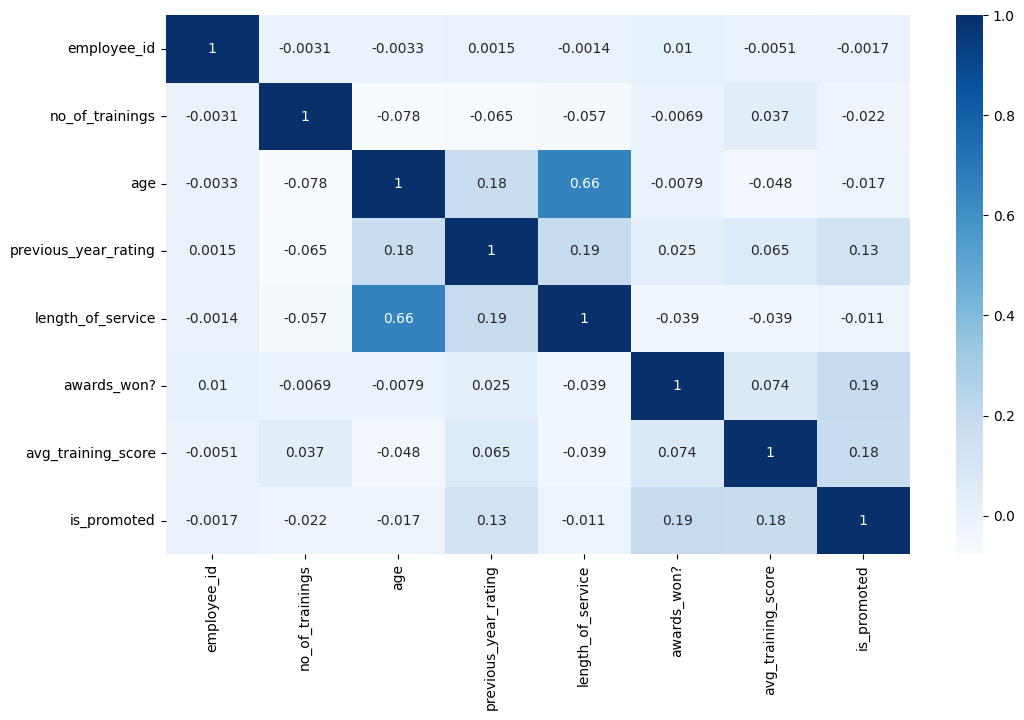

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(train.corr(),annot=True,cmap='Blues')
plt.show()

## Drop Unused Columns

Menghapus kolom yang tidak berguna untuk proses pemodelan

In [ ]:
train['region'].value_counts()

region_2     9074
region_22    4723
region_7     3553
region_15    2049
region_13    1950
region_26    1640
region_31    1401
region_4     1262
region_27    1187
region_16    1051
region_28     963
region_11     955
region_23     837
region_29     722
region_32     696
region_20     642
region_19     642
region_25     612
region_14     594
region_5      569
region_17     569
region_6      519
region_30     499
region_8      473
region_10     465
region_1      440
region_24     364
region_12     358
region_9      302
region_21     296
region_3      248
region_34     218
region_33     204
region_18      23
Name: region, dtype: int64

In [ ]:
train.drop(columns = 'employee_id', inplace = True)

## Label Encoding

mengonversi nilai-nilai dalam satu kolom kategori menjadi bilangan bulat (angka)

In [ ]:
#  mengonversi nilai-nilai dalam satu kolom kategori menjadi bilangan bulat (angka)

label_encode = LabelEncoder()
for i in train.columns:
    if train[i].dtype == 'object':
        train[i]=label_encode.fit_transform(train[i])

In [ ]:
train.sample(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
15682,4,11,2,0,0,1,60,4.0,17,0,64,0
24030,0,11,0,1,0,1,32,4.0,8,0,80,0
25697,7,19,0,1,0,1,26,5.0,4,0,54,0
34701,8,14,0,0,1,2,28,0.0,1,0,85,0
38730,0,17,0,1,0,1,28,3.0,4,0,88,1
14737,8,11,2,0,0,1,52,2.0,2,0,82,0
5564,8,28,2,1,2,1,36,1.0,3,0,81,0
35303,7,2,0,1,0,1,37,5.0,2,0,46,0
33983,0,14,0,1,2,1,30,4.0,4,0,86,0
38336,7,11,0,1,2,1,40,3.0,13,0,47,0


In [ ]:
train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,7,5,3,1,0,1,23,1.0,2,0,53,0
1,1,21,0,1,0,2,26,0.0,1,0,58,0
2,4,14,0,0,2,2,29,0.0,1,0,62,0
3,0,28,2,1,0,1,32,4.0,5,0,84,0
4,7,18,0,0,0,1,31,3.0,5,0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40095,8,11,1,1,0,2,24,0.0,1,0,80,1
40096,4,14,2,0,2,1,34,5.0,5,0,59,0
40097,4,6,0,1,0,1,27,0.0,1,0,60,0
40098,8,11,0,0,0,1,34,3.0,4,0,79,0


## Data Scaling

proses mengubah rentang nilai dari fitur dalam dataset sehingga setiap fitur memiliki skala yang sama. dilakukan untuk membantu algoritma machine learning dalam mempelajari pola yang lebih baik dan meningkatkan akurasi model

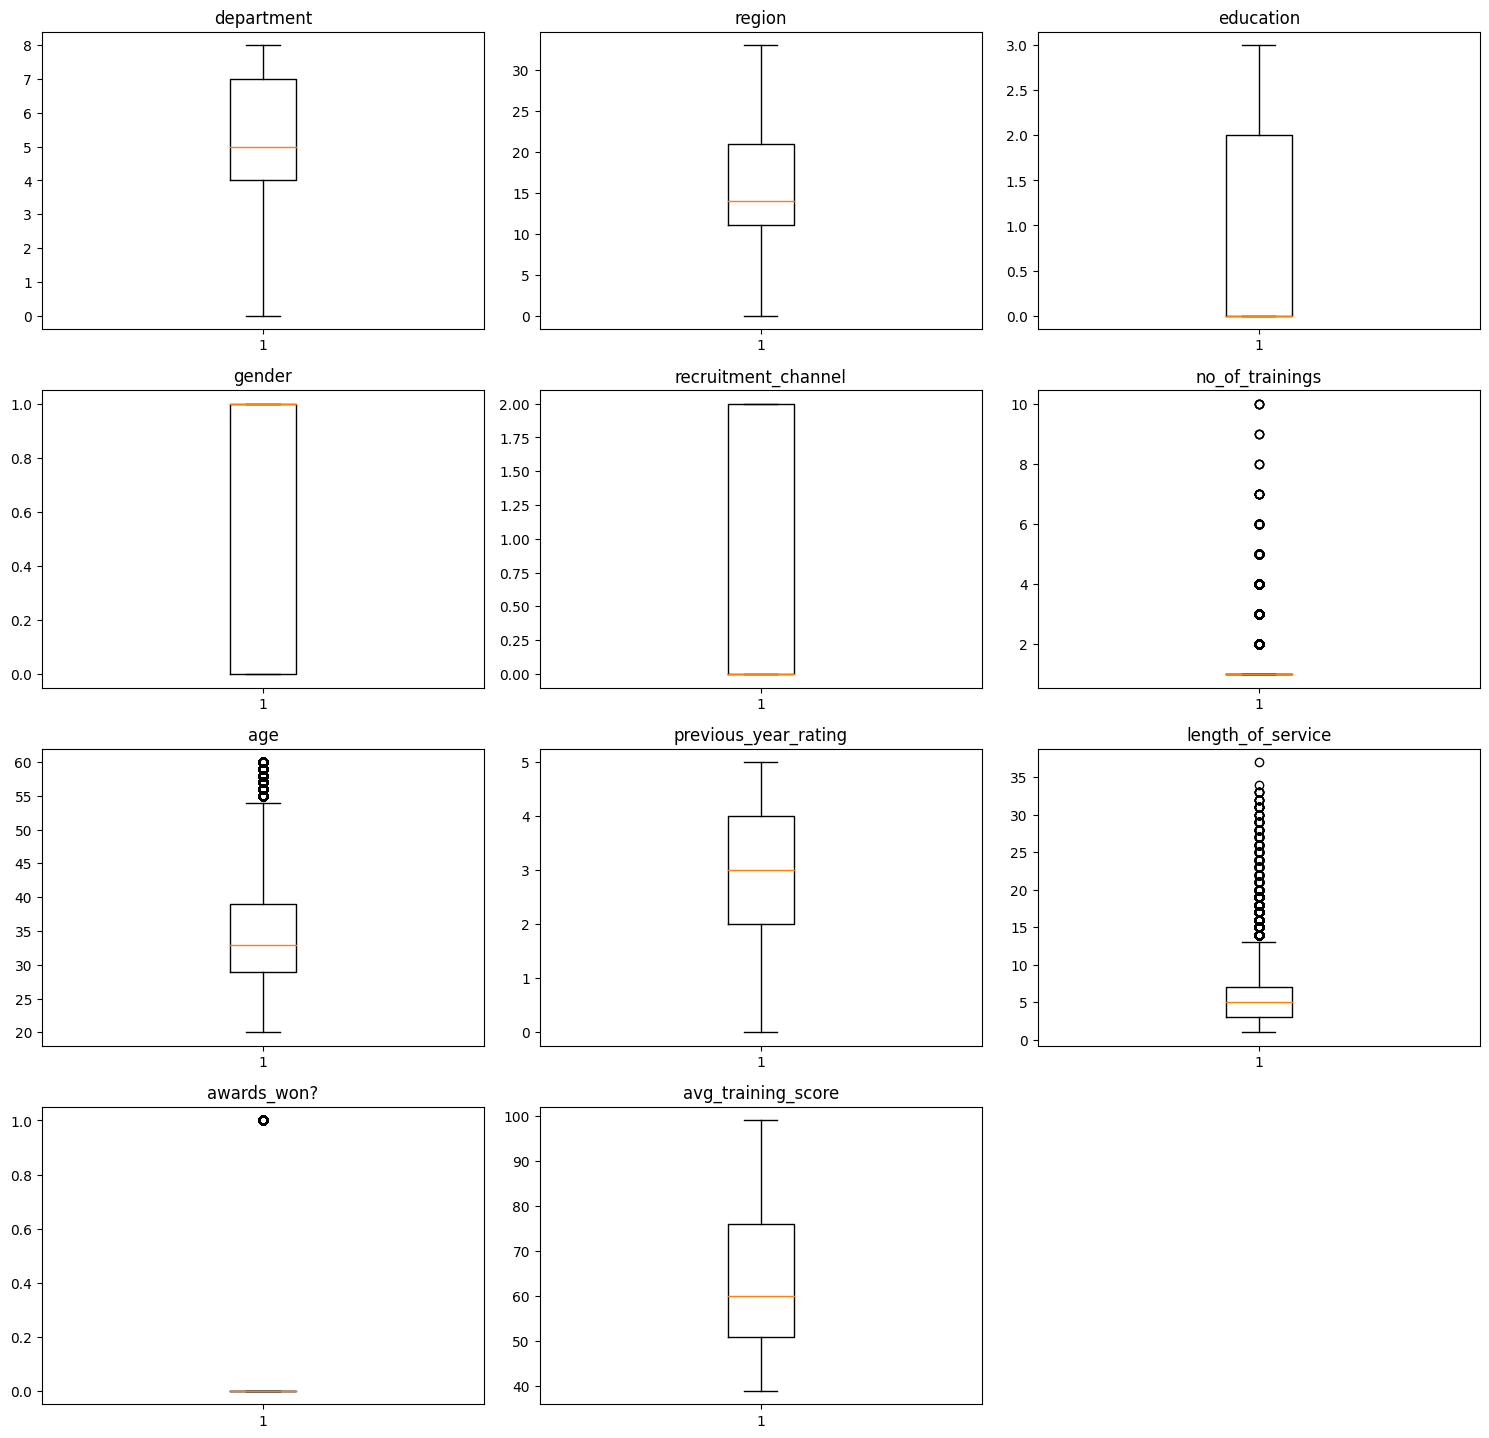

In [ ]:
# Distribusi data

plt.figure(figsize=(15,25))
for i in range(0,len(train.columns)-1):
  plt.subplot(7,len(train.columns)//4,i+1)
  plt.boxplot(train.iloc[:,i])
  plt.title(train.columns[i])
  plt.tight_layout()

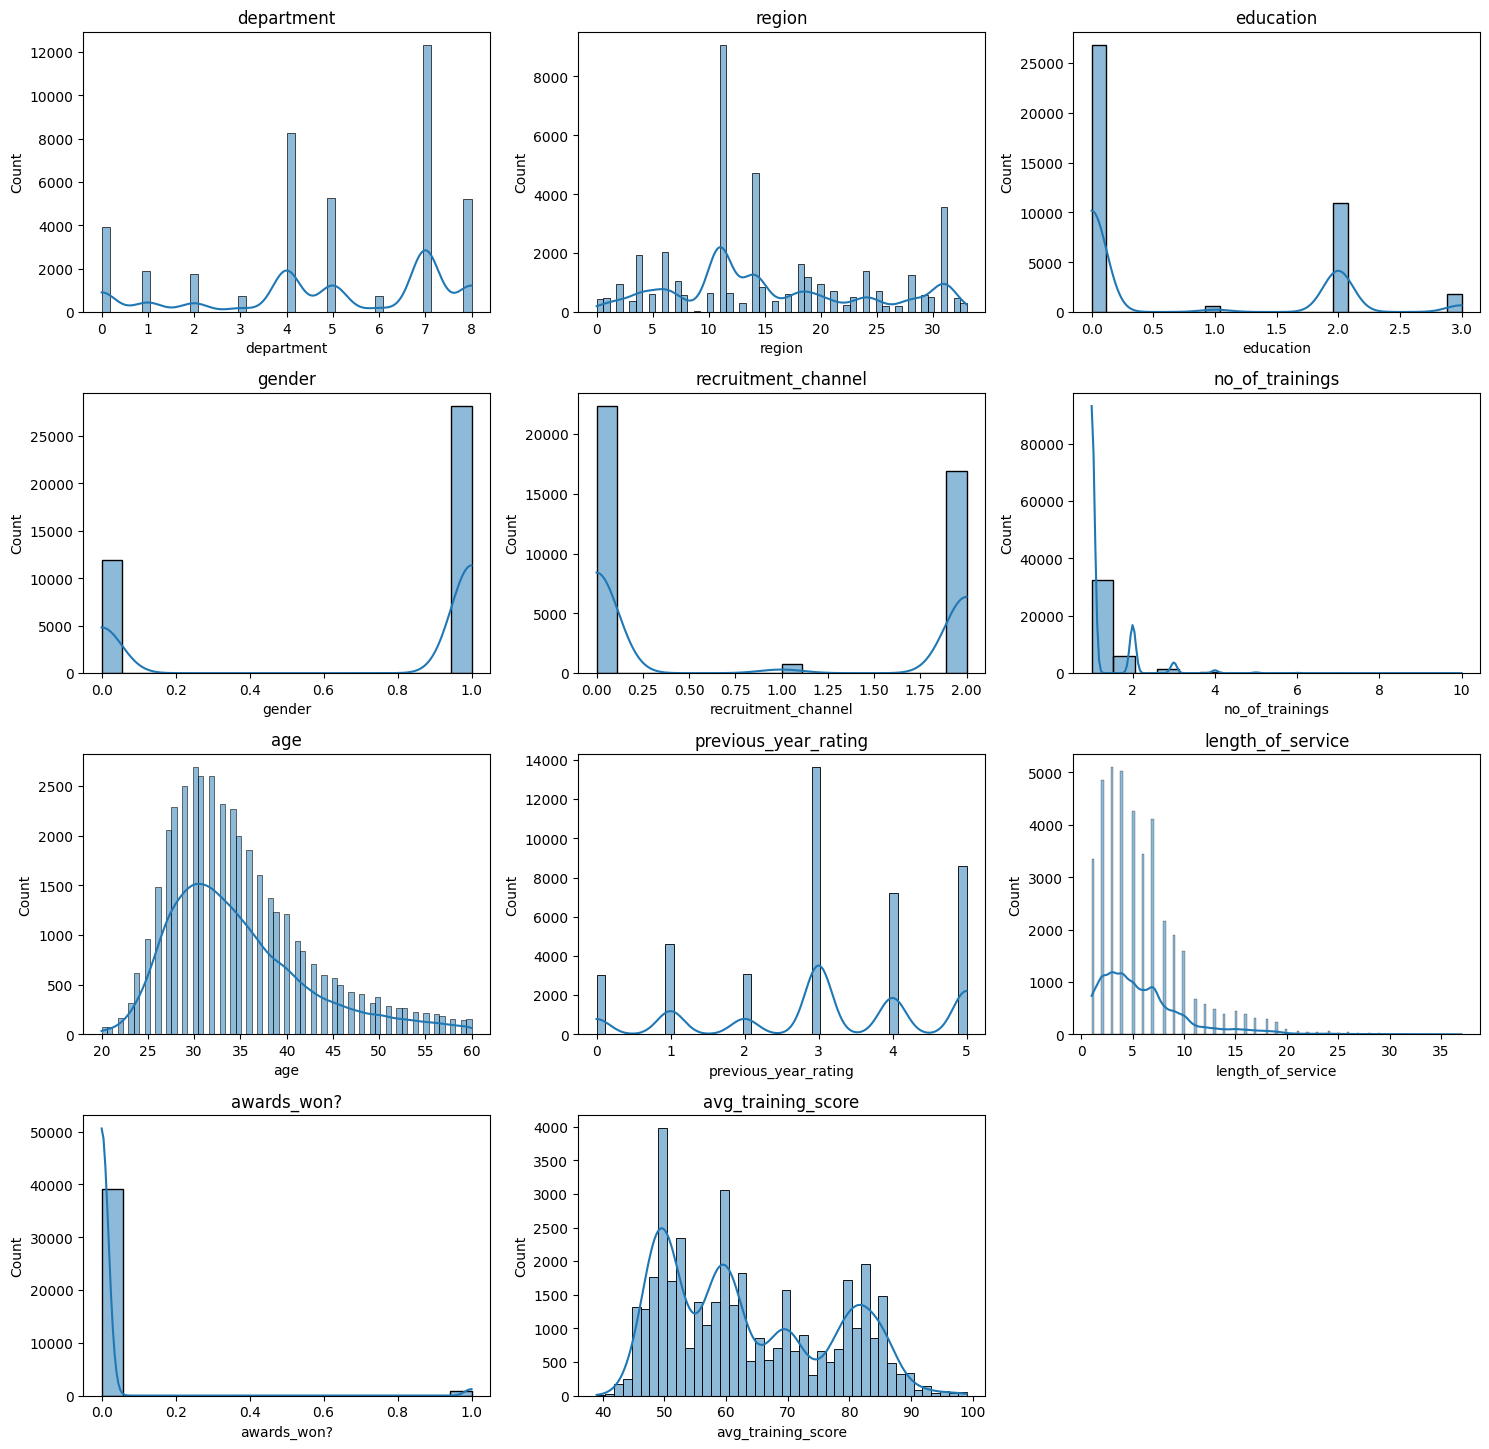

In [ ]:
# Distribusi data dengan histogram dan KDE plot
plt.figure(figsize=(15, 25))
for i in range(0, len(train.columns) - 1):
    plt.subplot(7, len(train.columns) // 4, i + 1)
    sns.histplot(train.iloc[:, i], kde=True, bins='auto')  # Menambahkan KDE plot ke histogram
    plt.title(train.columns[i])
    plt.tight_layout()

In [ ]:
# Data Train dengan minmax scaler untuk mengubah nilai pada setiap kolom agar menjadi rentang skala yang sama (0 - 1)

scaler = MinMaxScaler()
scaler.fit(train)
train_scaled = scaler.transform(train)
train_scaled = pd.DataFrame(train_scaled, columns = train.columns)

train_scaled

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,0.875,0.151515,1.000000,1.0,0.0,0.000000,0.075,0.2,0.027778,0.0,0.233333,0.0
1,0.125,0.636364,0.000000,1.0,0.0,0.111111,0.150,0.0,0.000000,0.0,0.316667,0.0
2,0.500,0.424242,0.000000,0.0,1.0,0.111111,0.225,0.0,0.000000,0.0,0.383333,0.0
3,0.000,0.848485,0.666667,1.0,0.0,0.000000,0.300,0.8,0.111111,0.0,0.750000,0.0
4,0.875,0.545455,0.000000,0.0,0.0,0.000000,0.275,0.6,0.111111,0.0,0.166667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
40095,1.000,0.333333,0.333333,1.0,0.0,0.111111,0.100,0.0,0.000000,0.0,0.683333,1.0
40096,0.500,0.424242,0.666667,0.0,1.0,0.000000,0.350,1.0,0.111111,0.0,0.333333,0.0
40097,0.500,0.181818,0.000000,1.0,0.0,0.000000,0.175,0.0,0.000000,0.0,0.350000,0.0
40098,1.000,0.333333,0.000000,0.0,0.0,0.000000,0.350,0.6,0.083333,0.0,0.666667,0.0


# Split Train Dataset into Train and Validation

Dataset training dipecah menjadi 80% data train, 20% data validation

In [ ]:
# split into 80% train and 20% validation
# --->>> train = 201.600 data
# --->>> val = 50.400 data

df_train = train_scaled.iloc[:32080]
df_val = train_scaled.iloc[32080:].reset_index(drop = True)

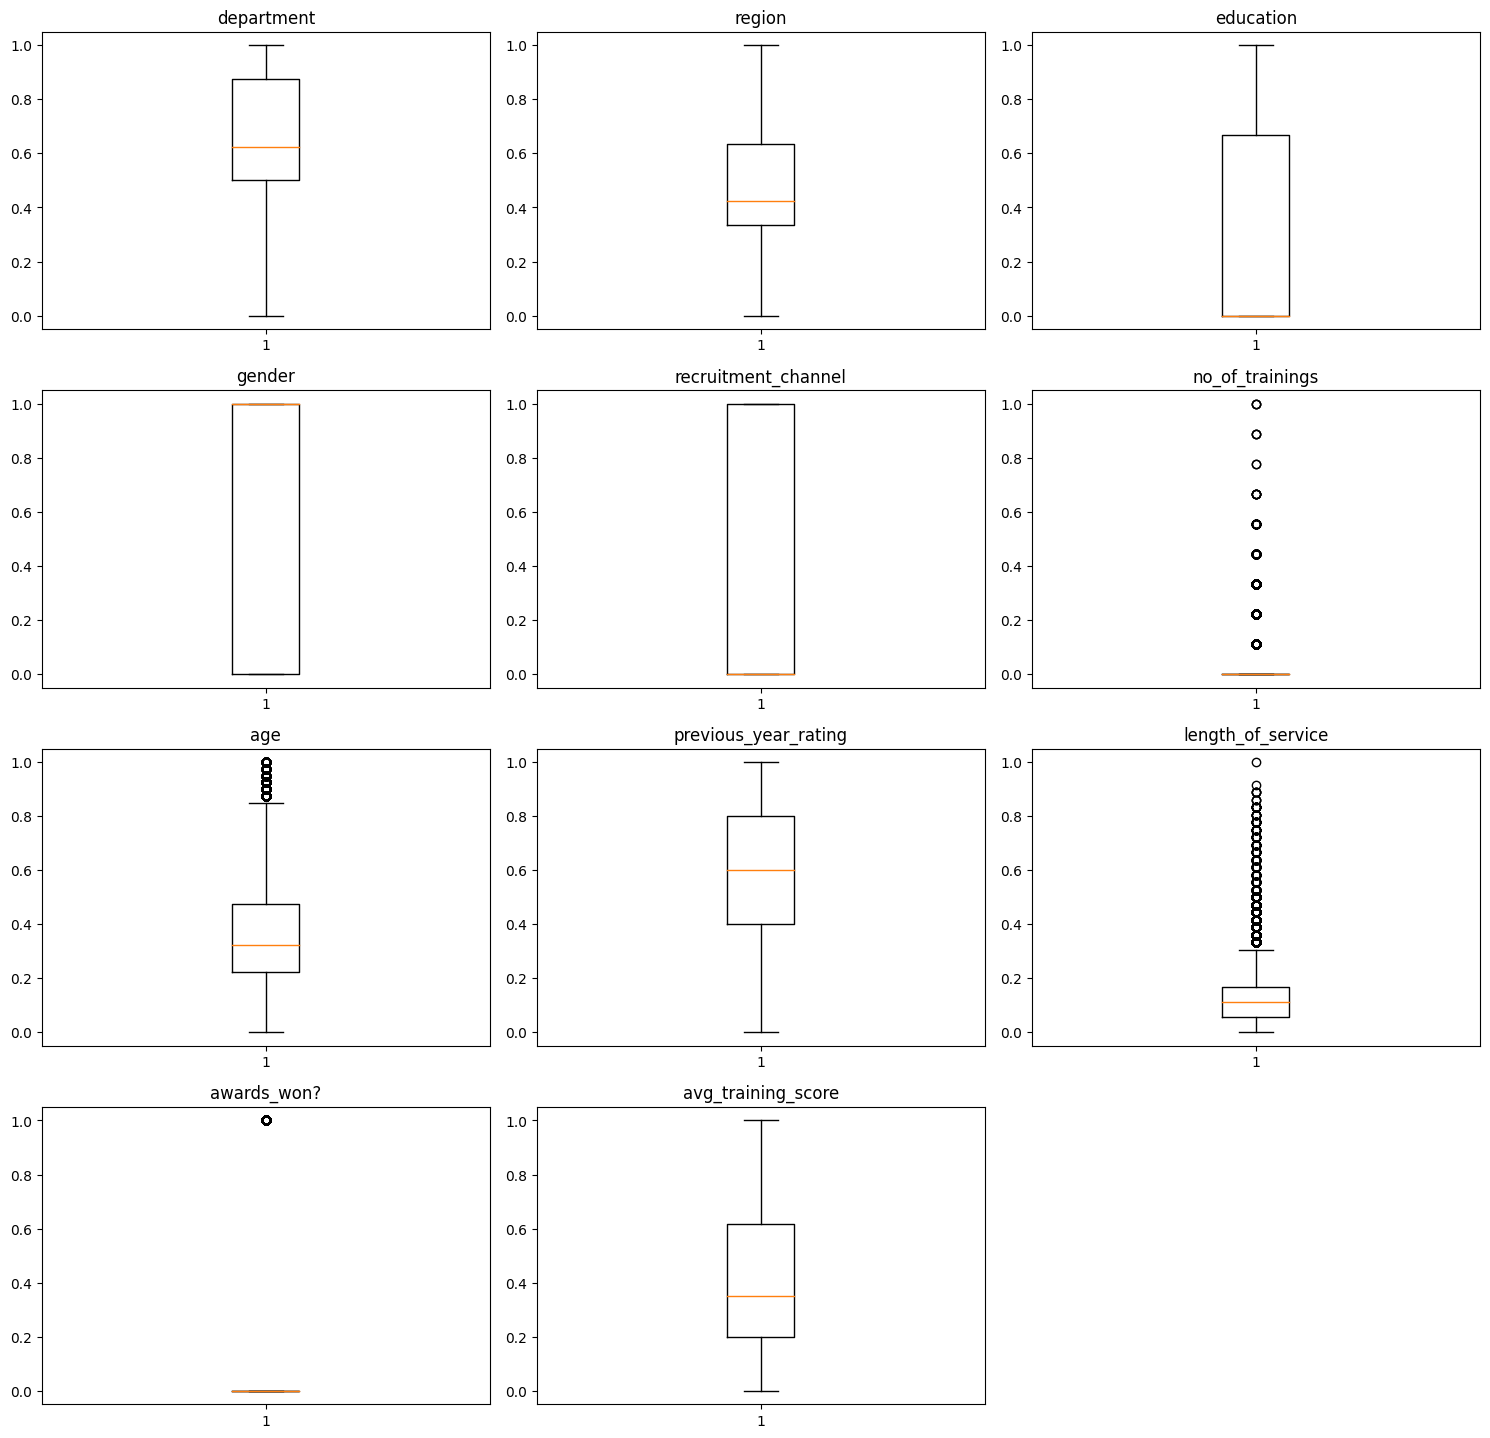

In [ ]:
# Distribusi data

plt.figure(figsize=(15,25))
for i in range(0,len(df_train.columns)-1):
  plt.subplot(7,len(df_train.columns)//4,i+1)
  plt.boxplot(df_train.iloc[:,i])
  plt.title(df_train.columns[i])
  plt.tight_layout()

##

## Split Data for Modeling

In [ ]:
# Split data untuk modeling (train test split)

X = df_train.drop(columns=['is_promoted'])
y = df_train['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Membuat function untuk menampilkan semua model yang dibandingkan
# beserta nilai akurasi metriknya (accuracy, precision, recall, f1, roc_auc)

def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if plot:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

In [ ]:
# Import semua model yang akan dibandingkan

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier


model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=42),
    'Ridge Classifier':RidgeClassifier(random_state=42),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(random_state=42),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=42),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=42),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=42),
    'XGBoost':XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=42),
    'Random Forest':RandomForestClassifier(random_state=42),
}

In [ ]:
# Import seluruh metrics akurasi

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train, y_train)
  y_pred_list[name] = model.predict(X_test)

score = get_score(y_pred_list, y_test, average='macro')

[LightGBM] [Info] Number of positive: 2010, number of negative: 22050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 24060, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.083541 -> initscore=-2.395178
[LightGBM] [Info] Start training from score -2.395178


,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,0.910100,0.797949,0.534281,0.541439,0.534281
Ridge Classifier,0.910474,0.915738,0.523127,0.520878,0.523127
KNN,0.911471,0.779550,0.556561,0.577691,0.556561
SVC,0.910848,0.844840,0.531704,0.536793,0.531704
Decision Tree,0.881546,0.659509,0.674580,0.666518,0.674580
Gradient Boosting Classifier,0.932793,0.940621,0.647841,0.708495,0.647841
AdaBoost Classifier,0.916958,0.870791,0.569751,0.599625,0.569751
Hist Gradient Boosting,0.935411,0.925231,0.669016,0.731289,0.669016
XGBoost,0.937157,0.909604,0.687318,0.748525,0.687318


# Modeling

In [ ]:
# modeling data train dengan XGBoost
# cek akurasi data train split

model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

model.score(X_train, y_train)

0.9512053200332502

In [ ]:
# Evaluasi dengan cek akurasi data test split

from sklearn import metrics

model_predict = model.predict(X_test)
print('Akurasi Menggunakan Model XGBoost Adalah: ', metrics.accuracy_score(y_test, model_predict))

Akurasi Menggunakan Model XGBoost Adalah:  0.9371571072319203


# Model Evaluation

Dilakukan evaluasi menggunakan data validation hasil split data train awal yang telah diketahui nilai label target sebenarnya untuk dibandingkan dengan hasil prediksi model

In [ ]:
# Split antara kolom features dan kolom target

X_val = df_val.drop(columns=['is_promoted'])
y_val = df_val['is_promoted']

In [ ]:
val_predict = model.predict(X_val)
# print(val_predict)

print('Akurasi model ini adalah: ', metrics.accuracy_score(y_val, val_predict))

Akurasi model ini adalah:  0.9380299251870324


# Prediction Data Testing

dilakukan prediksi menggunakan data baru atau data yang ingin diprediksi sebagai submission. data tersebut sudah memiliki kunci jawaban mengenai nilai label target dari masing masing data yang diprediksi. nantinya akan dihitung presentase prediksi yang benar sebagai gambaran performa model dalam memprediksi data data baru yang akan datang

## Equal Treatment Based on Data Train

In [ ]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,3387,Procurement,region_15,Bachelor's,f,other,1,36,3.0,3,0,69
1,67479,Sales & Marketing,region_7,Bachelor's,m,sourcing,2,31,5.0,4,0,51
2,8070,Operations,region_13,Bachelor's,f,sourcing,1,40,3.0,13,0,63
3,46497,Analytics,region_26,Bachelor's,m,other,1,31,1.0,4,0,85
4,54990,Operations,region_28,Bachelor's,m,sourcing,1,24,NaN,1,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...
14702,51178,Technology,region_16,Bachelor's,m,sourcing,1,30,4.0,8,0,77
14703,16756,Procurement,region_13,Master's & above,f,other,1,37,5.0,8,0,68
14704,745,Technology,region_22,Bachelor's,m,referred,1,31,4.0,4,0,78
14705,17637,R&D,region_10,Master's & above,m,other,1,34,5.0,6,0,87


### Handling Null Values

In [ ]:
df_test = test.copy()
df_test.isna().sum()

employee_id                0
department                 0
region                     0
education                641
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1100
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [ ]:
# Mengisi nilai kosong pada kolom pendidikan dengan nilai "tidak diketahui"
df_test['education'].fillna('unknown', inplace = True)

# Mengisi nilai kosong pada kolom previous year rating dengan nilai 0
df_test['previous_year_rating'].fillna(0, inplace = True)

### Drop Unused Columns

In [ ]:
df_test.drop(columns = 'employee_id', inplace = True)

### Label Encoding

In [ ]:
#  mengonversi nilai-nilai dalam satu kolom kategori menjadi bilangan bulat (angka)

label_encode = LabelEncoder()
for i in df_test.columns:
    if df_test[i].dtype == 'object':
        df_test[i]=label_encode.fit_transform(df_test[i])

In [ ]:
df_test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,5,6,0,0,0,1,36,3.0,3,0,69
1,7,31,0,1,2,2,31,5.0,4,0,51
2,4,4,0,0,2,1,40,3.0,13,0,63
3,0,18,0,1,0,1,31,1.0,4,0,85
4,4,20,0,1,2,1,24,0.0,1,0,55
...,...,...,...,...,...,...,...,...,...,...,...
14702,8,7,0,1,2,1,30,4.0,8,0,77
14703,5,4,2,0,0,1,37,5.0,8,0,68
14704,8,14,0,1,1,1,31,4.0,4,0,78
14705,6,1,2,1,0,1,34,5.0,6,0,87


### Data Scaling

In [ ]:
# Data Train dengan minmax scaler untuk mengubah nilai pada setiap kolom agar menjadi rentang skala yang sama (0 - 1)

scaler = MinMaxScaler()
scaler.fit(df_test)
df_test_scaled = scaler.transform(df_test)
df_test_scaled = pd.DataFrame(df_test_scaled, columns = df_test.columns)

df_test_scaled

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,0.625,0.181818,0.000000,0.0,0.0,0.000000,0.400,0.6,0.060606,0.0,0.500000
1,0.875,0.939394,0.000000,1.0,1.0,0.111111,0.275,1.0,0.090909,0.0,0.200000
2,0.500,0.121212,0.000000,0.0,1.0,0.000000,0.500,0.6,0.363636,0.0,0.400000
3,0.000,0.545455,0.000000,1.0,0.0,0.000000,0.275,0.2,0.090909,0.0,0.766667
4,0.500,0.606061,0.000000,1.0,1.0,0.000000,0.100,0.0,0.000000,0.0,0.266667
...,...,...,...,...,...,...,...,...,...,...,...
14702,1.000,0.212121,0.000000,1.0,1.0,0.000000,0.250,0.8,0.212121,0.0,0.633333
14703,0.625,0.121212,0.666667,0.0,0.0,0.000000,0.425,1.0,0.212121,0.0,0.483333
14704,1.000,0.424242,0.000000,1.0,0.5,0.000000,0.275,0.8,0.090909,0.0,0.650000
14705,0.750,0.030303,0.666667,1.0,0.0,0.000000,0.350,1.0,0.151515,0.0,0.800000


## Predict Test Dataset

In [ ]:
# Predict data test dengan menggunakan model yang dimiliki

prediction = model.predict(df_test_scaled)

In [ ]:
# Menambahkan kolom baru pada test yakni hasil prediksi menggunakan model

test['is_promoted'] = prediction
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,3387,Procurement,region_15,Bachelor's,f,other,1,36,3.0,3,0,69,0
1,67479,Sales & Marketing,region_7,Bachelor's,m,sourcing,2,31,5.0,4,0,51,0
2,8070,Operations,region_13,Bachelor's,f,sourcing,1,40,3.0,13,0,63,0
3,46497,Analytics,region_26,Bachelor's,m,other,1,31,1.0,4,0,85,0
4,54990,Operations,region_28,Bachelor's,m,sourcing,1,24,NaN,1,0,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14702,51178,Technology,region_16,Bachelor's,m,sourcing,1,30,4.0,8,0,77,0
14703,16756,Procurement,region_13,Master's & above,f,other,1,37,5.0,8,0,68,0
14704,745,Technology,region_22,Bachelor's,m,referred,1,31,4.0,4,0,78,0
14705,17637,R&D,region_10,Master's & above,m,other,1,34,5.0,6,0,87,0


# Checking Model Accuracy

In [ ]:
submission = submission.rename(columns = {'is_promoted' : 'is_promoted_act'})
submission

,employee_id,is_promoted_act
0,3387,1
1,67479,0
2,8070,0
3,46497,0
4,54990,0
...,...,...
14702,51178,0
14703,16756,0
14704,745,0
14705,17637,0


In [ ]:
dz_test = test[['employee_id', 'is_promoted']]
dz_test = dz_test.rename(columns = {'is_promoted' : 'is_promoted_pred'})
dz_test['is_promoted_pred'] = dz_test['is_promoted_pred'].astype(int)
dz_test

,employee_id,is_promoted_pred
0,3387,0
1,67479,0
2,8070,0
3,46497,0
4,54990,0
...,...,...
14702,51178,0
14703,16756,0
14704,745,0
14705,17637,0


In [ ]:
check = dz_test.merge(submission, how = 'inner', on = 'employee_id')
check

,employee_id,is_promoted_pred,is_promoted_act
0,3387,0,1
1,67479,0,0
2,8070,0,0
3,46497,0,0
4,54990,0,0
...,...,...,...
14702,51178,0,0
14703,16756,0,0
14704,745,0,0
14705,17637,0,0


In [ ]:
df_check = check[check['is_promoted_pred'] == check['is_promoted_act']]
print('Presentase keakuratan prediksi menggunakan model adalah: ', len(df_check) * 100 / len(check),"%")

Presentase keakuratan prediksi menggunakan model adalah:  94.24763717957435 %
